C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8554 - loss: 0.5028
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9594 - loss: 0.1410
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9740 - loss: 0.0896
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9788 - loss: 0.0682
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0515
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0358
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0265
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9941 - loss: 0.0214
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9953 - loss: 0.0167
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0156


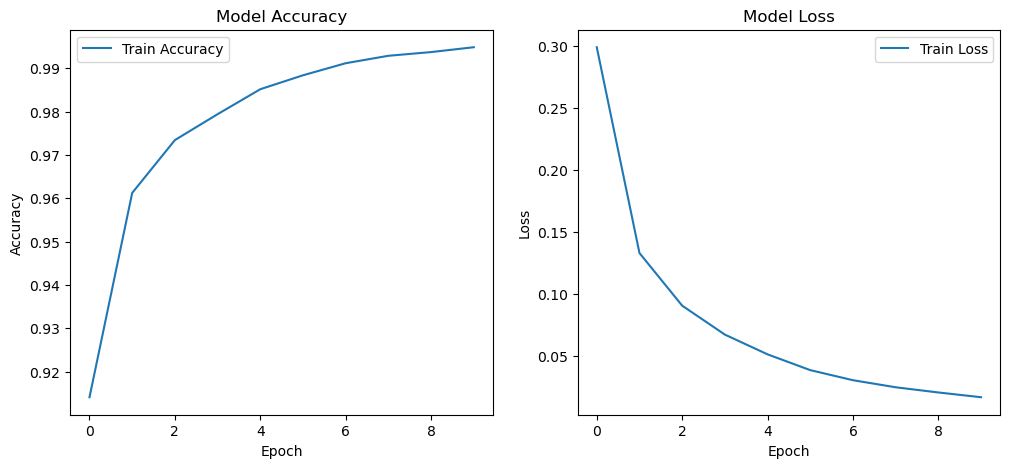

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

train_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"
test_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

x_train = train_df.drop(columns=['label']).values / 255.0
y_train = train_df['label'].values

if 'label' in test_df.columns:
    x_test = test_df.drop(columns=['label']).values / 255.0
    y_test = test_df['label'].values
    has_labels = True
else:
    x_test = test_df.values / 255.0
    y_test = None
    has_labels = False

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test) if has_labels else None)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if has_labels:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
if has_labels:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

if has_labels:
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc:.4f}')
